# Handwritten number recognition using Keras part 1.

In [1]:
#!pip install keras

In [2]:
#!pip install tensorflow

In [3]:
## From keras.utils import to_categorical ## don't use this

#from tensorflow.keras.utils import to_categorical # use this

import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils



In [4]:
## loading the dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
y_test.shape

(10000,)

In [6]:
x_train.shape

(60000, 28, 28)

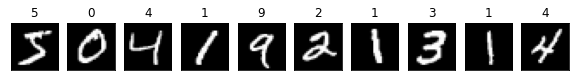

In [7]:
fig,axes = plt.subplots(ncols=10,sharex=False,
                       sharey=True,figsize =(10,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i],cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()    

In [8]:
## converting x_train and y_train into categorical data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
y_test.shape

(10000, 10)

In [10]:
import pandas as pd

In [11]:
pd.options.display.max_columns = None

In [12]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10,activation ='sigmoid'))
model.add(Dense(8,activation ='sigmoid'))
model.add(Dense(10,activation ='softmax'))

2021-10-15 21:06:51.669856: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                90        
Total params: 8,028
Trainable params: 8,028
Non-trainable params: 0
_________________________________________________________________


In [15]:
#!pip install pydot

In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer ='adam',
             metrics='acc')

In [17]:
model.fit(x_train,y_train, epochs=20,
         validation_data=(x_test, y_test))

2021-10-15 21:06:51.772053: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1875/1875 [==============================] - 2s 907us/step - loss: 1.6659 - acc: 0.5366 - val_loss: 1.1178 - val_acc: 0.7340
Epoch 2/20
1875/1875 [==============================] - 2s 851us/step - loss: 0.9678 - acc: 0.7168 - val_loss: 0.8349 - val_acc: 0.7205
Epoch 3/20
1875/1875 [==============================] - 2s 883us/step - loss: 0.8027 - acc: 0.7482 - val_loss: 0.7790 - val_acc: 0.7251
Epoch 4/20
1875/1875 [==============================] - 2s 870us/step - loss: 0.7115 - acc: 0.7885 - val_loss: 0.6621 - val_acc: 0.8076
Epoch 5/20
1875/1875 [==============================] - 2s 856us/step - loss: 0.6600 - acc: 0.8019 - val_loss: 0.6375 - val_acc: 0.7821
Epoch 6/20
1875/1875 [==============================] - 2s 851us/step - loss: 0.6361 - acc: 0.7997 - val_loss: 0.6427 - val_acc: 0.8072
Epoch 7/20
1875/1875 [==============================] - 2s 840us/step - loss: 0.5782 - acc: 0.8294 - val_loss: 0.5553 - val_acc: 0.8461
Epoch 8/20
1875/1875 [==========================

In [18]:
## saving the model
model.save('mnist_model.h5')

In [19]:
ls

dataset_dogs_vs_cats/    mnist_model.h5           train/
dogs-vs-cats.zip         sampleSubmission.csv     train.zip
keras_Hello_World.ipynb  test1/
mnist_cnn_model1.h5      test1.zip


# Handwritten number recognition using Keras part 2 and Google Colab

## MNIST using CNN

In [20]:
import matplotlib.pyplot as plt
import cv2
from keras.layers import Dense, Flatten,Dropout,Activation
from keras.layers import Conv2D,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils
from keras.utils import np_utils
from keras.datasets import mnist

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [22]:
y_train[2]

4

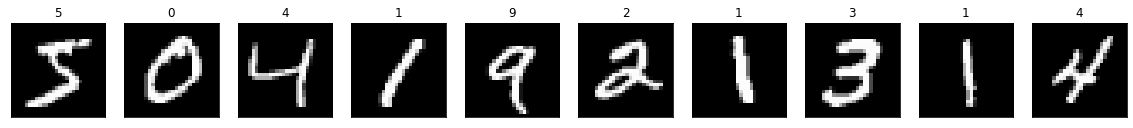

In [23]:
fig,axes = plt.subplots(ncols=10,sharex=False,
                       sharey=True, figsize=(20,4))
for x in range(10):
    axes[x].set_title(y_train[x])
    axes[x].imshow(x_train[x], cmap='gray')
    axes[x].get_xaxis().set_visible(False)
    axes[x].get_yaxis().set_visible(False)
plt.show()        

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [26]:
x_train.shape

(60000, 28, 28, 1)

In [27]:
x_train[0][0]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=uint8)

In [28]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [29]:
x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [30]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [31]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu',
                 kernel_initializer='he_uniform', input_shape =(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation= 'relu',kernel_initializer='he_uniform'))
model.add(Dense(10, activation = 'softmax'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [33]:
## Let's compile the model
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size=32,epochs=2,verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/2
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1370 - accuracy: 0.9582 - val_loss: 0.0711 - val_accuracy: 0.9769
Epoch 2/2
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0475 - accuracy: 0.9852 - val_loss: 0.0502 - val_accuracy: 0.9825


## Savig the model

In [34]:
model.save('mnist_cnn_model1.h5')

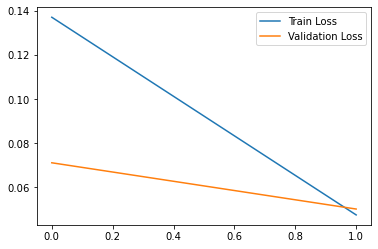

In [35]:
## plotting the the losses
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.legend()


In [36]:
ls

dataset_dogs_vs_cats/    mnist_model.h5           train/
dogs-vs-cats.zip         sampleSubmission.csv     train.zip
keras_Hello_World.ipynb  test1/
mnist_cnn_model1.h5      test1.zip


In [37]:
## Let's load the same model
model_s = keras.models.load_model("mnist_cnn_model1.h5")

<IPython.core.display.Javascript object>

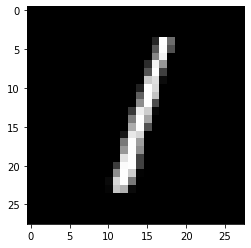

In [38]:
plt.imshow(x_test[2],cmap='gray')

In [39]:
x = np.reshape(x_test[2],(1,28,28,1))
np.argmax(model_s.predict(x))               

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1

In [40]:
print('**'*30)

************************************************************


## Transfer Learning Project Cats vs Dogs Classification

In [41]:
## https://www.kaggle.com/c/dogs-vs-cats/data

In [42]:
from zipfile import ZipFile

In [43]:
with ZipFile('dogs-vs-cats.zip','r') as zipObj:
    # extract all the content of zip file in current directory
    zipObj.extractall()

In [44]:
ls

dataset_dogs_vs_cats/    mnist_model.h5           train/
dogs-vs-cats.zip         sampleSubmission.csv     train.zip
keras_Hello_World.ipynb  test1/
mnist_cnn_model1.h5      test1.zip


In [45]:
## extract train.zip files

with ZipFile('train.zip','r') as zipObj:
    # extract all the content of zip file in current directory
    zipObj.extractall()

In [46]:
## extract test1.zip files

with ZipFile('test1.zip','r') as zipObj:
    # extract all the content of zip file in current directory
    zipObj.extractall()

### let's seperate cats and dogs in this format


-dataset_dogs_vs_cats
    -train
         --dogs
         --cats
    -test
         --dogs
         -- cats

In [47]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed, random


In [48]:
## create directory

dataset_home = 'dataset_dogs_vs_cats/'
subdirs=['train/','test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labeldir in labeldirs:
        newdir = dataset_home + subdir + labeldir
        makedirs(newdir, exist_ok= True)

In [49]:
## create directories
seed(1)
val_ratio = 0.25
# copy training dataset image into subdirectories
src_directory = 'train'
dataset_home ='dataset_dogs_vs_cats/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/' + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/' + file
        copyfile(src, dst)     

### Prepare the model for transfer learning

In [50]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
model = VGG16(include_top=False, input_shape=(224, 224, 3))
# make loaded layers as no trainable
for layer in model.layers:
    layer.trainable = False
    
## add new classifier layers

flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)

# define new model
model = Model(inputs = model.inputs, outputs = output)

# complile the model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])
             

In [51]:
datagen = ImageDataGenerator(featurewise_center=True)
# specify imagenet mean values for centering

datagen.mean = [123.68, 116.779, 103.939]
# prepare iterator
train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
                                      class_mode= 'binary',batch_size=64, target_size =(224, 224))

test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
                                      class_mode= 'binary',batch_size=64, target_size =(224, 224))
# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
                             validation_data= test_it, validation_steps=len(test_it), epochs = 5, verbose =1)


Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
293/293 [==============================] - 4675s 16s/step - loss: 0.2074 - accuracy: 0.9657 - val_loss: 0.0718 - val_accuracy: 0.9703
Epoch 2/5
293/293 [==============================] - 4406s 15s/step - loss: 0.0240 - accuracy: 0.9928 - val_loss: 0.0826 - val_accuracy: 0.9719
Epoch 3/5
293/293 [==============================] - 4639s 16s/step - loss: 0.0060 - accuracy: 0.9987 - val_loss: 0.0813 - val_accuracy: 0.9757
Epoch 4/5
293/293 [==============================] - 6171s 21s/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 0.0944 - val_accuracy: 0.9773
Epoch 5/5
293/293 [==============================] - 5246s 18s/step - loss: 9.4562e-04 - accuracy: 0.9998 - val_loss: 0.0989 - val_accuracy: 0.9767


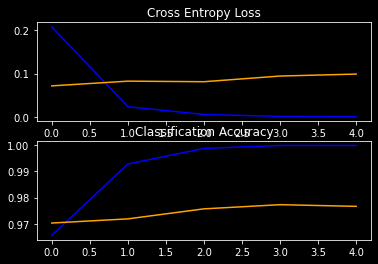

In [55]:
import matplotlib.pyplot as plt
import sys
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'],color='blue',label ='train') 
plt.plot(history.history['val_loss'],color='orange',label ='test') 
# plot the accuracy
plt.subplot(212)
plt.title('Classification Accuracy') 
plt.plot(history.history['accuracy'],color='blue',label ='train') 
plt.plot(history.history['val_accuracy'],color='orange',label ='test')           
# save plot to file
plt.style.use('dark_background')
filename = sys.argv[0].split('/')[1]
plt.savefig(filename + '_plot.png')          
          

## savaing the model.

In [56]:
model.save('final_model.h5')

In [57]:
ls

dataset_dogs_vs_cats/    mnist_cnn_model1.h5      test1/
dogs-vs-cats.zip         mnist_model.h5           test1.zip
final_model.h5           opt_plot.png             train/
keras_Hello_World.ipynb  sampleSubmission.csv     train.zip


In [93]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
model = load_model('final_model.h5')
## load and prepare the image
# load the image
img = load_img('/Users/oliverla412/Desktop/DataTrainded2/Deep_Learning/Keras/dataset_dogs_vs_cats/test/dogs/dog.0.jpg',
              target_size=(224, 224))
## convert to arry
img = img_to_array(img)

# reshape into a single sample with 3 channels
img = img.reshape(1,224, 224,3)
# center pixel data
img = img.astype('float32')
img = img- [123.68, 116.779, 103.939]


In [96]:
result = model.predict(img)
print(result)

[[0.9999998]]
